In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import func

In [2]:
# Load the dir
futureOBDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/futuresOB/"
futureTradeDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/futuresTrades/"
stockDir = "/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/Hongsong CHOU/data/stocks/"

In [3]:
futureData = func.combineFutureData('QWF')
stockData = func.combineStockData('2388')

In [4]:
commonDays = func.findCommonDay(stockData, futureData)
stockData, futureData = func.indexStockFuture(stockData, futureData, commonDays)
futureData_downsampled = func.syncFuture(stockData, futureData)

In [5]:
stockPrice = stockData['price']
futurePrice = futureData_downsampled['midQ']

stockPrice, futurePrice = func.deleZeroNa(stockPrice, futurePrice)

In [6]:
gamma = stockPrice[0] / futurePrice[0]
X = np.log(stockPrice / stockPrice[0]) - gamma * np.log(futurePrice / futurePrice[0])

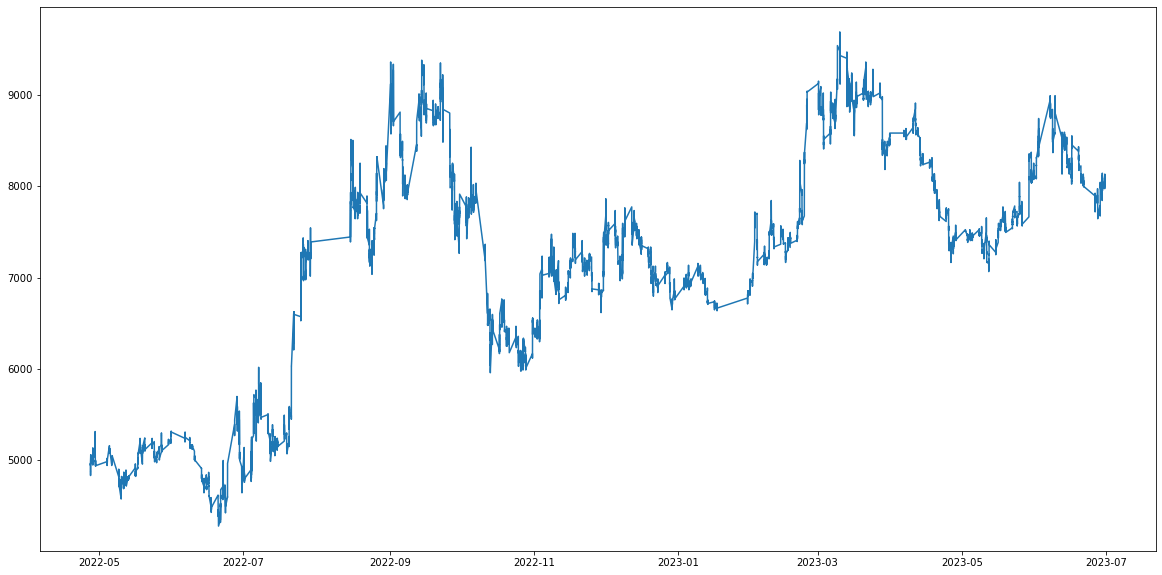

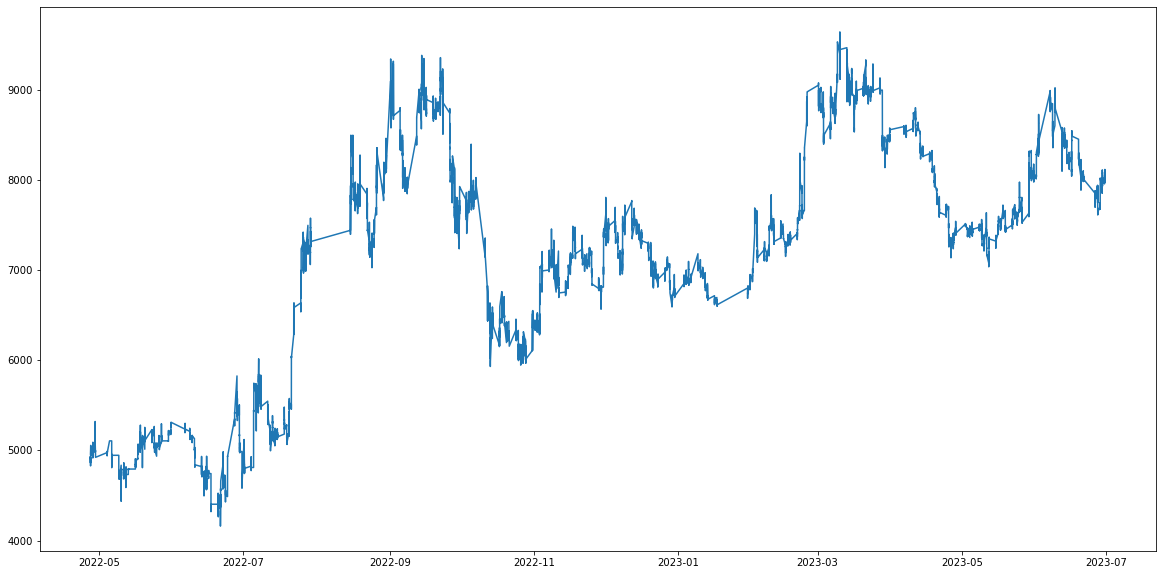

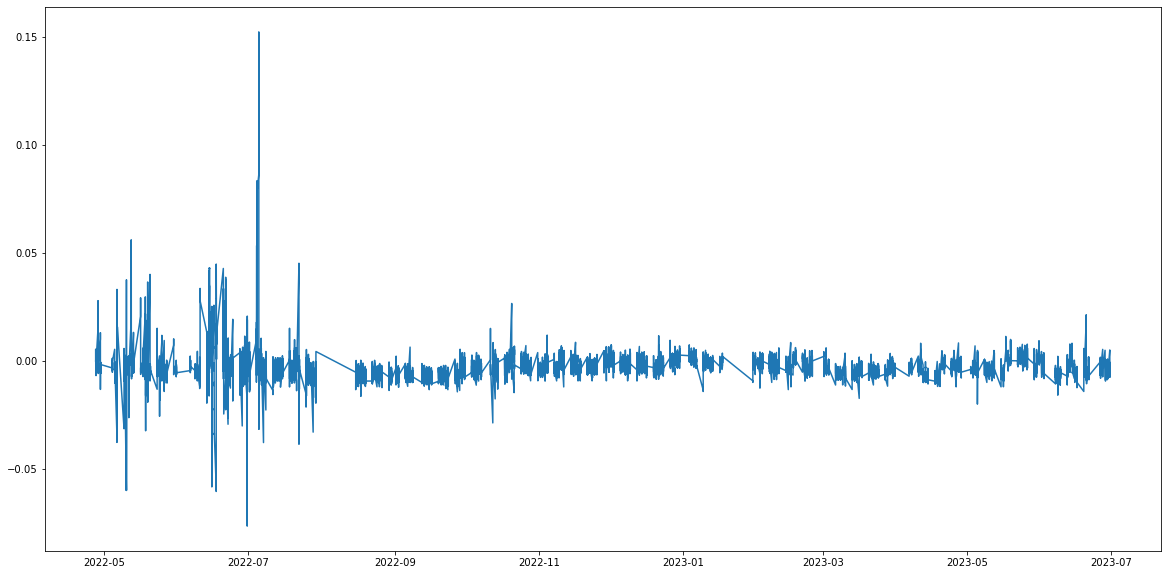

In [7]:
func.pricePlot(stockPrice)
func.pricePlot(futurePrice)
func.pricePlot(X)

In [12]:
path = '/Users/shezihua/Downloads/QWF-2388/'
func.path_exists_make(path)

In [14]:
futureData_downsampled.to_csv(path + 'future.csv.gz', compression='gzip', index=False)

In [ ]:
stockData.to_csv(path + 'stock.csv.gz', compression='gzip', index=False)

In [17]:
X.to_csv(path + 'spread.csv.gz', compression='gzip', index=False)